In [205]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import  mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,precision_recall_curve,classification_report

In [17]:
from sklearn.datasets import load_digits,load_boston,load_iris

In [19]:
data = load_iris()
features=data.data
label=data.target
features

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [81]:
train_feature,test_feature,train_label,test_label=train_test_split(features,label,test_size=0.3)

### Random Forest

In [82]:
rfc=RandomForestClassifier()
rfc.fit(train_feature,train_label)
predict_label=rfc.predict(test_feature)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
accuracy_score(test_label,predict_label)

0.97777777777777775

In [88]:
iris=load_iris()
f_list=iris.data
l_list=iris.target

In [89]:
rf=RandomForestClassifier()
params={'n_estimators':range(1,11)}
model=GridSearchCV(estimator=rf,param_grid=params)
model.fit(f_list,l_list)
print('最优分数:',model.best_score_)
print('最优分数:',model.best_params_)

最优分数: 0.966666666667
最优分数: {'n_estimators': 3}


In [92]:
rf=RandomForestClassifier()
params_pip={'randomforestclassifier__n_estimators':range(1,11)}
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('randomforestclassifier',rf)
]
)

In [93]:
model_new=GridSearchCV(estimator=pipeline,param_grid=params_pip)
model_new.fit(f_list,l_list)
print('最优分数:',model_new.best_score_)
print('最优分数:',model_new.best_params_)

最优分数: 0.973333333333
最优分数: {'randomforestclassifier__n_estimators': 9}


## Kmeans

In [58]:
ms=MinMaxScaler()
features_ms=ms.fit_transform(features)
x=[]
y=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features_ms)
    x.append(i)
    y.append(kmeans.inertia_)


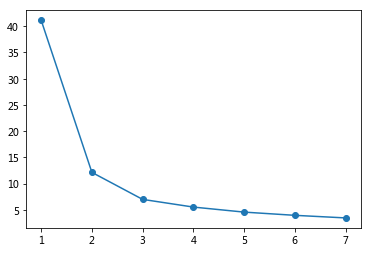

In [64]:
# elbow method
plt.plot(x,y,marker='o')
plt.show() #如图展示,在k>3之后,斜率就基本不变了,因此选最优k=3

## Logistic regression

In [199]:
credit=pd.read_csv('/Users/rickie/Desktop/mysql_learning/UCI_Credit_Card.csv')
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


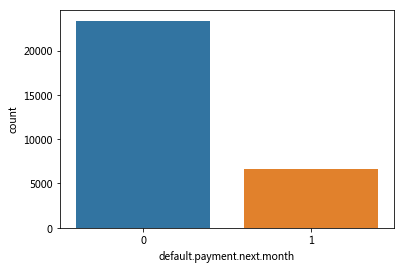

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [200]:
lr=LogisticRegression()
label=credit['default.payment.next.month']
sns.countplot(label)
plt.show()
credit['default.payment.next.month'].value_counts()

In [201]:
# credit['default.payment.next.month'].value_counts().values
# plt.bar(x=credit['default.payment.next.month'].value_counts().index,height=credit['default.payment.next.month'].value_counts().values)
# plt.show()

In [202]:
features=credit.iloc[:,1:-1]
ms=StandardScaler()
features=ms.fit_transform(features)

train_x,test_x,train_y,test_y=train_test_split(features,label,test_size=0.3)
lr.fit(train_x,train_y)
predict_y=lr.predict(test_x)
cm=confusion_matrix(test_y,predict_y)
cm

array([[6797,  223],
       [1473,  507]])

In [207]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
def print_confusion_matrix(cm):
    TN=cm[0][0]
    FP=cm[0][1]
    FN=cm[1][0]
    TP=cm[1][1]
    print('precision:{:.3f}'.format(TP/(TP+FP)))   
    print('recall:',format((TP/(TP+FN)),'.3f'))
    print('F1 score:',format(2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN)))),'.3f'))

In [138]:
print_confusion_matrix(cm)

precision:0.699
recall: 0.227
F1 score: 0.342


In [206]:
precision,recall,thresholds=precision_recall_curve(predict_y,test_y)
print(classification_report(predict_y,test_y))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89      8270
          1       0.26      0.69      0.37       730

avg / total       0.91      0.81      0.85      9000



### KNN

In [190]:
digits=load_digits()
features=digits.data
label=digits.target
train_feature,test_feature,train_label,test_label=train_test_split(features,label,test_size=0.3)
mm=MinMaxScaler()
train_feature=mm.fit_transform(train_feature)
test_feature=mm.transform(test_feature)

knn=KNeighborsClassifier()
knn.fit(train_feature,train_label)
pred_y=knn.predict(test_feature)
accuracy_score(test_label,pred_y)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [194]:
params={'n_neighbors':range(2,8)}
model=GridSearchCV(estimator=knn,param_grid=params)
model.fit(train_feature,train_label)
model.predict(test_feature)
print(model.best_params_)
print(model.best_score_)

{'n_neighbors': 3}
0.984884645982


In [197]:
predict_label=[]
score=[]
index=[]
for i in range(2,8):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_feature,train_label)
    predict_label=model.predict(test_feature)
    score.append(accuracy_score(test_label,predict_label))
    index.append(i)
score

[0.98148148148148151,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328]

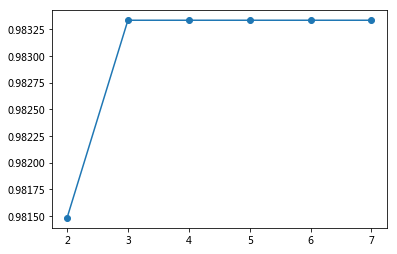

In [198]:
plt.plot(index,score,marker='o')
plt.show()

In [210]:
df=pd.DataFrame({'col1':[1,2,4],'col2':['x','y','x']})
df

,col1,col2
0,1,x
1,2,y
2,4,x


In [236]:
def get_sum(df):
    return sum([i for i in df])
df.groupby('col2').agg({'col1':[get_sum]})

,col1
,get_sum
col2,
x,5
y,2
